# Data Analysis: LeNet-5 x FashionMNIST

*Version History*

* **4.0** - Analyze results of grid search (*batch size* x *learning rate*)


## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

from src.utils.utils import parse_log_dir, get_training_results, get_training_durations
from src.visualization.color import get_tinted_color
from src.visualization.utils import save_figure

## Grid Search: Batch Size x Learning Rate


### Analyze Training Results

In [2]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/grid_search/batch_size_lr/2024-08-25_16-49-23"
grid_search_results = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
grid_search_results = grid_search_results.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Display overall results
grid_search_results

,b,lr,Epochs,Loss,Acc@1,Acc@5
0,8,0.001,11,0.300,0.892,0.999
1,8,0.010,10,0.379,0.865,0.997
2,8,0.100,1,2.317,0.100,0.500
3,16,0.001,13,0.305,0.893,0.998
4,16,0.010,11,0.326,0.886,0.998
5,16,0.100,1,2.308,0.100,0.500
6,32,0.001,24,0.303,0.889,0.998
7,32,0.010,8,0.315,0.889,0.998
8,32,0.100,1,2.308,0.100,0.500
9,64,0.001,43,0.302,0.894,0.998


In [3]:
# Group results by learning rate
grouped_by_lr = grid_search_results.groupby("lr")
col_order = ["b", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by learning rate
for lr, group in grouped_by_lr:
    print(f"\033[1mLEARNING RATE: {lr}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

LEARNING RATE: 0.001
   b  Acc@1  Loss  Epochs
   8  0.892 0.300      11
  16  0.893 0.305      13
  32  0.889 0.303      24
  64  0.894 0.302      43
 128  0.886 0.319      44
 256  0.881 0.332      67
 512  0.876 0.356      98
1024  0.852 0.422     100
2048  0.802 0.550      98
4096  0.751 0.676      99


LEARNING RATE: 0.01
   b  Acc@1  Loss  Epochs
   8  0.865 0.379      10
  16  0.886 0.326      11
  32  0.889 0.315       8
  64  0.893 0.300       8
 128  0.887 0.301       9
 256  0.897 0.301      27
 512  0.893 0.301      28
1024  0.882 0.328      34
2048  0.877 0.341      54
4096  0.859 0.385      57


LEARNING RATE: 0.1
   b  Acc@1  Loss  Epochs
   8  0.100 2.317       1
  16  0.100 2.308       1
  32  0.100 2.308       1
  64  0.852 0.415      11
 128  0.875 0.342      10
 256  0.876 0.339       9
 512  0.878 0.354      18
1024  0.881 0.326      26
2048  0.888 0.307      33
4096  0.856 0.403      44




In [4]:
# Group results by batch size
grouped_by_b = grid_search_results.groupby("b")
col_order = ["lr", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by batch size
for b, group in grouped_by_b:
    print(f"\033[1mBATCH SIZE: {b}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

BATCH SIZE: 8
   lr  Acc@1  Loss  Epochs
0.001  0.892 0.300      11
0.010  0.865 0.379      10
0.100  0.100 2.317       1


BATCH SIZE: 16
   lr  Acc@1  Loss  Epochs
0.001  0.893 0.305      13
0.010  0.886 0.326      11
0.100  0.100 2.308       1


BATCH SIZE: 32
   lr  Acc@1  Loss  Epochs
0.001  0.889 0.303      24
0.010  0.889 0.315       8
0.100  0.100 2.308       1


BATCH SIZE: 64
   lr  Acc@1  Loss  Epochs
0.001  0.894 0.302      43
0.010  0.893 0.300       8
0.100  0.852 0.415      11


BATCH SIZE: 128
   lr  Acc@1  Loss  Epochs
0.001  0.886 0.319      44
0.010  0.887 0.301       9
0.100  0.875 0.342      10


BATCH SIZE: 256
   lr  Acc@1  Loss  Epochs
0.001  0.881 0.332      67
0.010  0.897 0.301      27
0.100  0.876 0.339       9


BATCH SIZE: 512
   lr  Acc@1  Loss  Epochs
0.001  0.876 0.356      98
0.010  0.893 0.301      28
0.100  0.878 0.354      18


BATCH SIZE: 1024
   lr  Acc@1  Loss  Epochs
0.001  0.852 0.422     100
0.010  0.882 0.328      34
0.100  0.881 0.326      2

### Analyze Training Durations

In [5]:
# Load and parse training durations (seconds per epoch for each individual epoch)
training_durations = parse_log_dir(log_dir, get_training_durations)

# Compute mean and standard error per batch size
duration_stats = training_durations.groupby("b")["duration"].agg(["mean", "sem"]).reset_index()

# Find best learning rate per batch size (in terms of loss) and corresponding number of epochs trained for
best_lr = grid_search_results.loc[grid_search_results.groupby("b")["Loss"].idxmin(), ["b", "lr", "Epochs"]]
duration_stats = pd.merge(duration_stats, best_lr, on="b")
duration_stats = duration_stats.rename(columns={
    "mean": "Mean",
    "sem": "SEM",
    "lr": "Best lr"
})

# Display results
duration_stats

,b,Mean,SEM,Best lr,Epochs
0,8,54.489568,0.044347,0.001,11
1,16,32.515350,0.015421,0.001,13
2,32,17.854563,0.023781,0.001,24
3,64,11.085104,0.007557,0.010,8
4,128,8.339462,0.005713,0.010,9
5,256,6.797619,0.003306,0.010,27
6,512,6.053372,0.003399,0.010,28
7,1024,5.558629,0.003226,0.100,26
8,2048,5.340629,0.002052,0.100,33
9,4096,5.140758,0.002226,0.010,57


### Visualize Training Durations

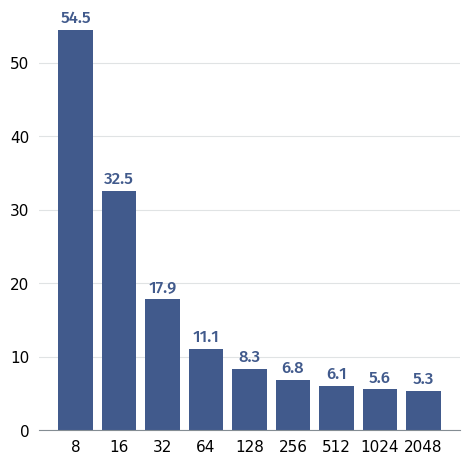

In [6]:
# Exclude batch size of 4096 from results
filtered_duration_stats = duration_stats[duration_stats["b"] != 4096]

# Initialize plot
fig_secs_per_epoch, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rc('font', family='Fira Sans')

# Remove left, top, and right spines (figure borders)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change color of bottom spine
ax.spines['bottom'].set_color(get_tinted_color("anthracite", tint=0.4))

# Add grid
ax.yaxis.grid(color=get_tinted_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Mean"],
    color=get_tinted_color("tory-blue"),
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 1,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      fontweight="roman",
      fontsize=12
  )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

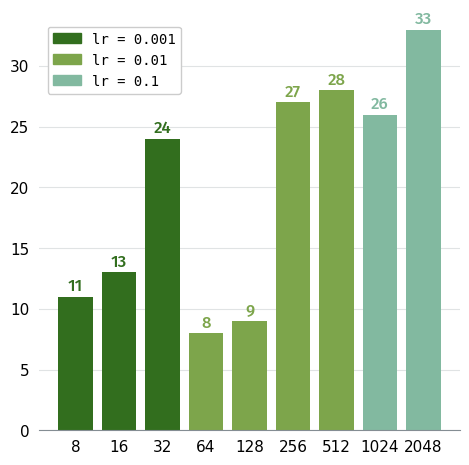

In [7]:
# Initialize plot
fig_num_epochs, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rc('font', family='Fira Sans')

# Remove left, top, and right spines (figure borders)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change color of bottom spine
ax.spines['bottom'].set_color(get_tinted_color("anthracite", tint=0.4))

# Add grid
ax.yaxis.grid(color=get_tinted_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Create color map to distinguish runs corresponding to different lr
lr_to_color_map = {
    0.001: get_tinted_color("bilbao"),
    0.01: get_tinted_color("chelsea-cucumber"),
    0.1: get_tinted_color("padua")
}

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Epochs"],
    color=[lr_to_color_map[lr] for lr in filtered_duration_stats["Best lr"]],
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.5,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      fontweight="roman",
      fontsize=12
  )

# Add legend
font_properties = FontProperties(family='monospace')
handles = [plt.Rectangle((0, 0), 1, 1, color=lr_to_color_map[lr]) for lr in lr_to_color_map]
labels = [f"lr = {lr}" for lr in lr_to_color_map]
legend = ax.legend(handles, labels, prop=font_properties, loc=(0.02, 0.8))
legend.get_frame().set_alpha(1)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

In [8]:
# Save figures
dir_name = Path("../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr")
save_figure(fig_secs_per_epoch, dir_name / "seconds_per_epoch.png")
save_figure(fig_num_epochs, dir_name / "num_epochs_vs_batch_size.png")

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/seconds_per_epoch.png.
Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/num_epochs_vs_batch_size.png.
